In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
data=pd.read_csv('tita.csv',sep=',')

In [34]:
print(data.head())
data.info()
data.describe()

   Unnamed: 0  PassengerId  Survived  Pclass  \
0           0          343         0       2   
1           1           76         0       3   
2           2          641         0       3   
3           3          568         0       3   
4           4          672         0       1   

                                          Name  Sex   Age  SibSp  Parch  \
0                   Collander, Mr. Erik Gustaf    0  28.0      0      0   
1                      Moen, Mr. Sigurd Hansen    0  25.0      0      0   
2                       Jensen, Mr. Hans Peder    0  20.0      0      0   
3  Palsson, Mrs. Nils (Alma Cornelia Berglund)    1  29.0      0      4   
4                       Davidson, Mr. Thornton    0  31.0      1      0   

       Ticket     Fare Embarked Title  family_size  
0      248740  13.0000        S   Mrs            1  
1      348123   7.6500        S   Mrs            1  
2      350050   7.8542        S   Mrs            1  
3      349909  21.0750        S   Mrs           

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,222.500000,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,445.000000,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,667.500000,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,890.000000,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [37]:
data['Embarked']=data['Embarked'].map({'S':0,'C':1})
Titles={'Title':{' Mr':0,' Miss':1,' Mrs':2,' Master':3,' Dr':4,' Rev':5,' Mlle':6,' Major':7,' Col':8,' the Countess':9,' Don':10,' Jonkheer':11,' Capt':12,' Lady':13,' Ms':14,' Sir':15,' Mme':16}}
data.replace(Titles, inplace=True)
data.head()



,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.0,0,0,248740,13.0000,NaN,1
1,1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,348123,7.6500,NaN,1
2,2,641,0,3,"Jensen, Mr. Hans Peder",0,20.0,0,0,350050,7.8542,NaN,1
3,3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,5
4,4,672,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,NaN,2


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [41]:
x=data[["Pclass",'Age','PassengerId','Fare','Sex']]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)

In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test) 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.79


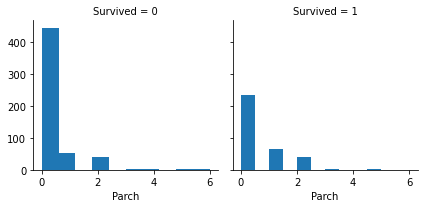

In [44]:
g=sns.FacetGrid(data,col='Survived')
g.map(plt.hist,'Parch')

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       189
           1       0.75      0.71      0.73       123

    accuracy                           0.79       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.79      0.79      0.79       312



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[160,  29],
       [ 36,  87]], dtype=int64)

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.776938959865789